In [47]:
%matplotlib inline
!python -V

Python 3.7.6


In [48]:
# import necessary Python packages
import os
import numpy as np
import urllib.request

# print message after packages imported successfully
print("import of packages successful")
os.getcwd()
os.chdir("E:/nvtng/Projects/GitHub/umap-explorer/data/")


import of packages successful


In [49]:
# data relate to time radar
# data = np.loadtxt(fname = "testingdata_bio.csv",delimiter=',')
# f = open('testingdata_bio_color.txt', 'r')

data = np.loadtxt(fname = "transcriptome.csv",delimiter=',')
f = open('transcriptome_color.txt', 'r')


data_color = f.read().splitlines()
f.close()


In [50]:
data_train = data[0:int(len(data)/2)]
data_test = data[int(len(data)/2):len(data)]

data_color_train = data_color[0:int(len(data)/2)]
data_color_test = data_color[int(len(data)/2):len(data)]

# data_train = data[0:int(len(data)/2)]
# data_test = data_train

# data_color_train = data_color[0:int(len(data)/2)]
# data_color_test = data_color_train


UMAP on the test dataset
--------------------------------


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
import numba
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore', numba.errors.NumbaDeprecationWarning)

    
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [52]:
# np.random.seed(42)
# data = np.random.rand(800, 9)
print(data[0,:])

[0.83098996 0.8781508  0.94151414 0.91504827 0.84199891 0.83746267]


In [62]:
fit = umap.UMAP()
%time u = fit.fit_transform(data_train)

E:\nvtng\Documents\anaconda2\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\Documents\anaconda2\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


Wall time: 18.1 s


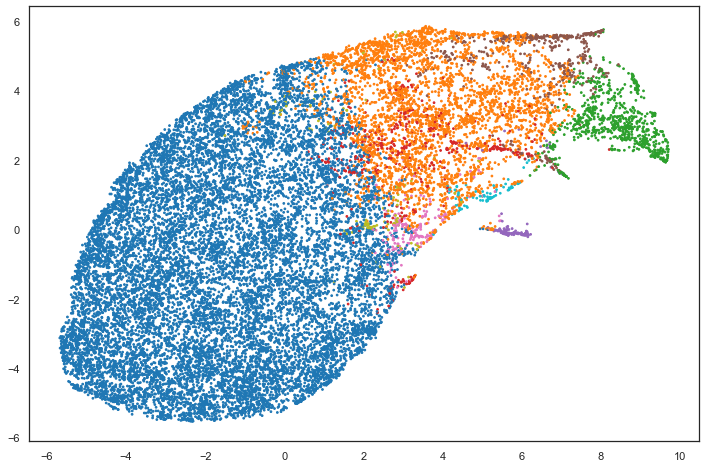

In [63]:
# plt.scatter(u[:,0], u[:,1], c=data)
plt.scatter(u[:,0], u[:,1],c=data_color_train,s=3)

transform 1st time

In [55]:
%time test_embedding = fit.transform(data_test)

E:\nvtng\Documents\anaconda2\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\Documents\anaconda2\lib\site-packages\umap\nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  state.func_ir.loc))
E:\nvtng\Documents\anaconda2\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\Documents\anaconda2\lib\site-packages\umap\nndescent.py"

Wall time: 5.32 s


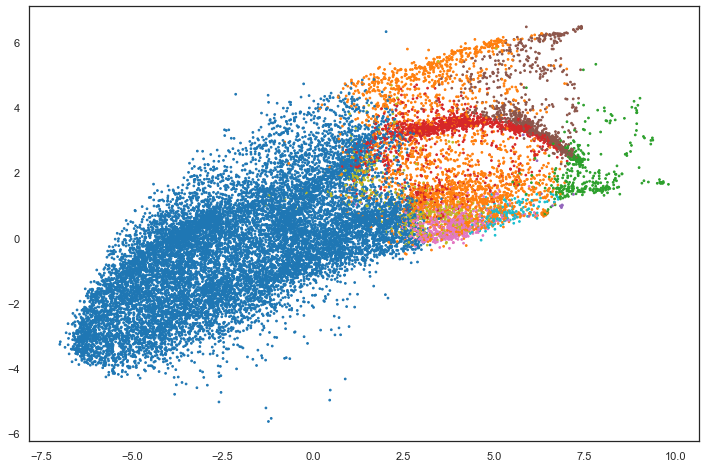

In [56]:
plt.scatter(test_embedding[:,0], test_embedding[:,1],c=data_color_test,s=3)

In [57]:
%time test_embedding = fit.transform(data_test)

Wall time: 3.31 s


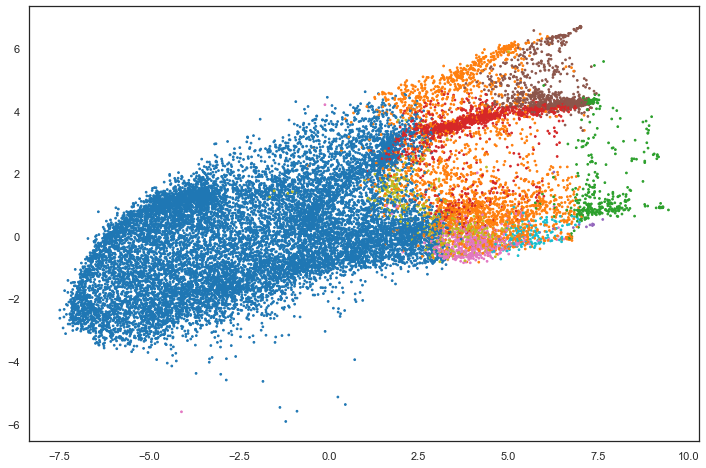

In [58]:
plt.scatter(test_embedding[:,0], test_embedding[:,1],c=data_color_test,s=3)

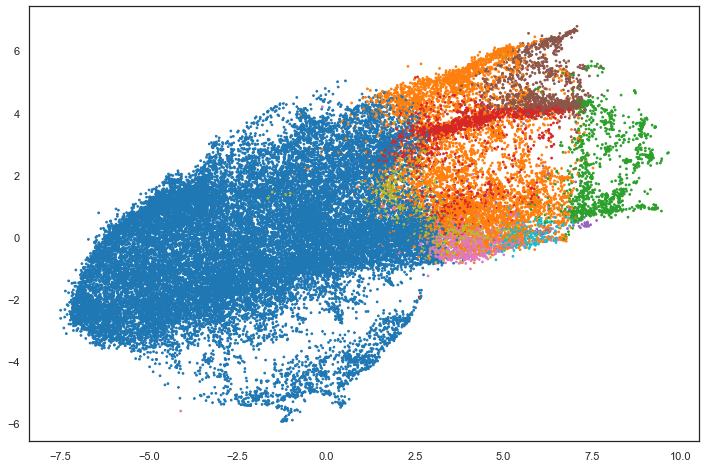

In [59]:
fig, ax = plt.subplots()
ax.scatter(u[:,0], u[:,1],c=data_color_train,s=3)
ax.scatter(test_embedding[:,0], test_embedding[:,1],c=data_color_test,s=3)